In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# load the dataset

In [3]:
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, usecols=[1], engine='python')
df.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [8]:
dataset = df.values
dataset[1:10]

array([[118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119]], dtype=int64)

In [11]:
dataset = dataset.astype('float32')
dataset[0:9]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.]], dtype=float32)

# split into train and test sets

In [12]:
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train, test =dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


# convert an array of values into a dataset matrix

In [13]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1

In [15]:
look_back =1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [18]:
trainX[0:3], testX[0:3]

(array([[112.],
        [118.],
        [132.]], dtype=float32),
 array([[315.],
        [301.],
        [356.]], dtype=float32))

In [20]:
print(len(trainX), len(trainY), len(testX), len(testY))

94 94 46 46


# create and fit Multilayer Perceptron model

In [21]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 30986.8533
Epoch 2/200
 - 0s - loss: 26049.5475
Epoch 3/200
 - 0s - loss: 20978.6420
Epoch 4/200
 - 0s - loss: 16169.9322
Epoch 5/200
 - 0s - loss: 11809.4856
Epoch 6/200
 - 0s - loss: 8142.5105
Epoch 7/200
 - 0s - loss: 5320.7452
Epoch 8/200
 - 0s - loss: 3296.8218
Epoch 9/200
 - 0s - loss: 1999.1862
Epoch 10/200
 - 0s - loss: 1253.6703
Epoch 11/200
 - 0s - loss: 850.5475
Epoch 12/200
 - 0s - loss: 666.6775
Epoch 13/200
 - 0s - loss: 582.5231
Epoch 14/200
 - 0s - loss: 552.5189
Epoch 15/200
 - 0s - loss: 540.6094
Epoch 16/200
 - 0s - loss: 537.9033
Epoch 17/200
 - 0s - loss: 537.0281
Epoch 18/200
 - 0s - loss: 536.1829
Epoch 19/200
 - 0s - loss: 536.7046
Epoch 20/200
 - 0s - loss: 536.5859
Epoch 21/200
 - 0s - loss: 538.8721
Epoch 22/200
 - 0s - loss: 542.3136
Epoch 23/200
 - 0s - loss: 538.8932
Epoch 24/200
 - 0s - loss: 535.4756
Epoch 25/200
 - 0s - loss: 538.2984
Epoch 26/200
 - 0s - loss: 539.2686
Epoch 27/200
 - 0s - loss: 540.3047
Epoch 28/200
 - 0s - l

In [23]:
import math
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' %(trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %2f MSE (%.2f RMSE)' %(testScore, math.sqrt(testScore)))

Train Score: 530.96 MSE (23.04 RMSE)
Test Score: 2353.436470 MSE (48.51 RMSE)


# generate predictions for training

In [24]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [26]:
trainPredict[0:10]

array([[113.072395],
       [118.99166 ],
       [132.80327 ],
       [129.84363 ],
       [121.95129 ],
       [135.7629  ],
       [148.58795 ],
       [148.58795 ],
       [136.74944 ],
       [119.9782  ]], dtype=float32)

# shift train predictions for plotting

In [28]:
trainPretictPlot = np.empty_like(dataset)
trainPretictPlot[0:10]

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.]], dtype=float32)

In [31]:
trainPretictPlot[:,:] = np.nan
trainPretictPlot[0:3]

array([[nan],
       [nan],
       [nan]], dtype=float32)

In [35]:
trainPretictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict
trainPretictPlot

array([[       nan],
       [113.072395],
       [118.99166 ],
       [132.80327 ],
       [129.84363 ],
       [121.95129 ],
       [135.7629  ],
       [148.58795 ],
       [148.58795 ],
       [136.74944 ],
       [119.9782  ],
       [105.18005 ],
       [118.99166 ],
       [116.03203 ],
       [126.88401 ],
       [141.68216 ],
       [135.7629  ],
       [125.89747 ],
       [149.5745  ],
       [170.2919  ],
       [170.2919  ],
       [158.45338 ],
       [133.78981 ],
       [115.04549 ],
       [140.6956  ],
       [145.62831 ],
       [150.56104 ],
       [178.18425 ],
       [163.3861  ],
       [172.265   ],
       [178.18425 ],
       [198.90166 ],
       [198.90166 ],
       [184.1035  ],
       [162.39955 ],
       [146.61487 ],
       [166.34572 ],
       [171.27844 ],
       [180.15733 ],
       [192.9824  ],
       [181.14388 ],
       [183.11696 ],
       [217.64598 ],
       [229.48448 ],
       [241.32301 ],
       [208.76707 ],
       [191.00932 ],
       [172.2

# Shift test predicts for plotting

In [38]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[0:4]

array([[112.],
       [118.],
       [132.],
       [129.]], dtype=float32)

In [39]:
testPredictPlot[:, :] = np.nan

In [40]:
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict
testPredictPlot

array([[      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],
       [      nan],


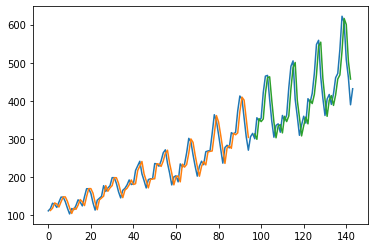

In [42]:
plt.plot(dataset)
plt.plot(trainPretictPlot)
plt.plot(testPredictPlot)
plt.show()